# Ann Arbor House Price Analysis

By: Grant Jason

For: SIADS 521, Assignment #3

In [41]:
# All my import statements at the top of the notebook
import requests
import os
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import style
from ipywidgets import interact, interactive, Dropdown, IntRangeSlider
from IPython.display import display, clear_output

In [19]:
# Download the data, filter, and clean it
url = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1742155647'
response = requests.get(url)

# Define downloads as the directory to save the file
writeable_directory = os.path.expanduser('~/Downloads')
file_path = os.path.join(writeable_directory, 'gajason Zillow Data')

with open(file_path, 'wb') as file:
    file.write(response.content)

df = pd.read_csv(file_path)

# Filter the data to only include Ann Arbor
filtered_df = df[df['City'] == 'Ann Arbor']

# Melt the data so all dates are in one column
melted_df = pd.melt(filtered_df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City' , 'Metro', 'CountyName'], 
                    var_name='Date', value_name='HomeValue')

melted_df['Date'] = pd.to_datetime(melted_df['Date'])

cleaned_file_path = os.path.join(writeable_directory, 'cleaned_gajason_Zillow_Data.csv')
melted_df.to_csv(cleaned_file_path, index=False)

### First Chart: Average Home Price in Ann Arbor Over Time

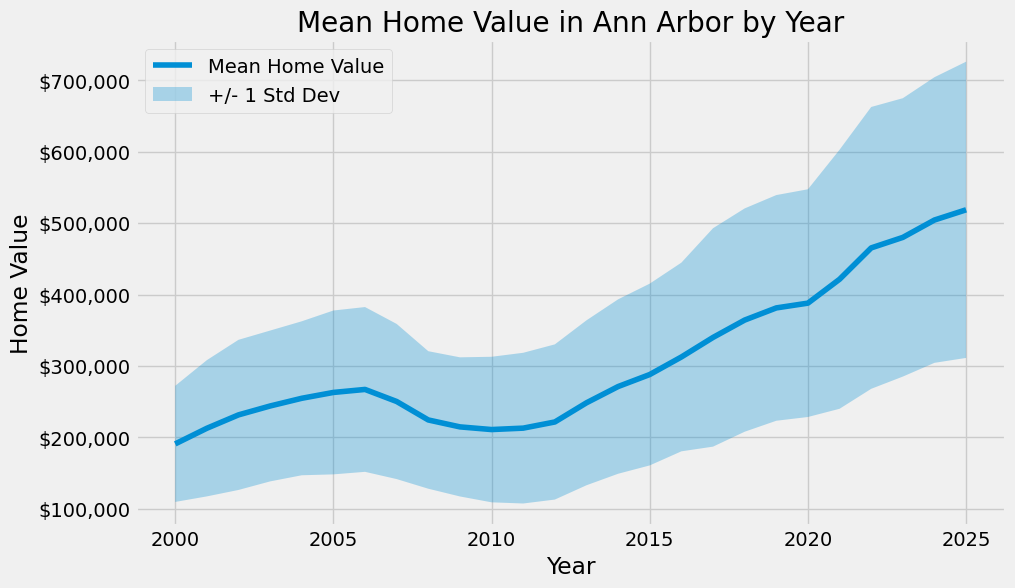

In [23]:
# Apply the style
plt.style.use('fivethirtyeight')

# prepare data for chart one
chart_one_df = melted_df.copy()
chart_one_df['Year'] = chart_one_df['Date'].dt.year

yearly_data = chart_one_df.groupby(['Year'])['HomeValue'].agg(['mean', 'std']).reset_index()

# create chart 1
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['mean'], label='Mean Home Value')
plt.fill_between(yearly_data['Year'], yearly_data['mean'] - yearly_data['std'], yearly_data['mean'] + yearly_data['std'], alpha=0.3)

fmt = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(fmt)

plt.xlabel('Year')
plt.ylabel('Home Value')
plt.title('Mean Home Value in Ann Arbor by Year')
plt.legend(['Mean Home Value', '+/- 1 Std Dev'])

### Second Chart: Price of Homes by Neighboorhood Over Time

Text(46.24999999999999, 0.5, 'Neighborhood')

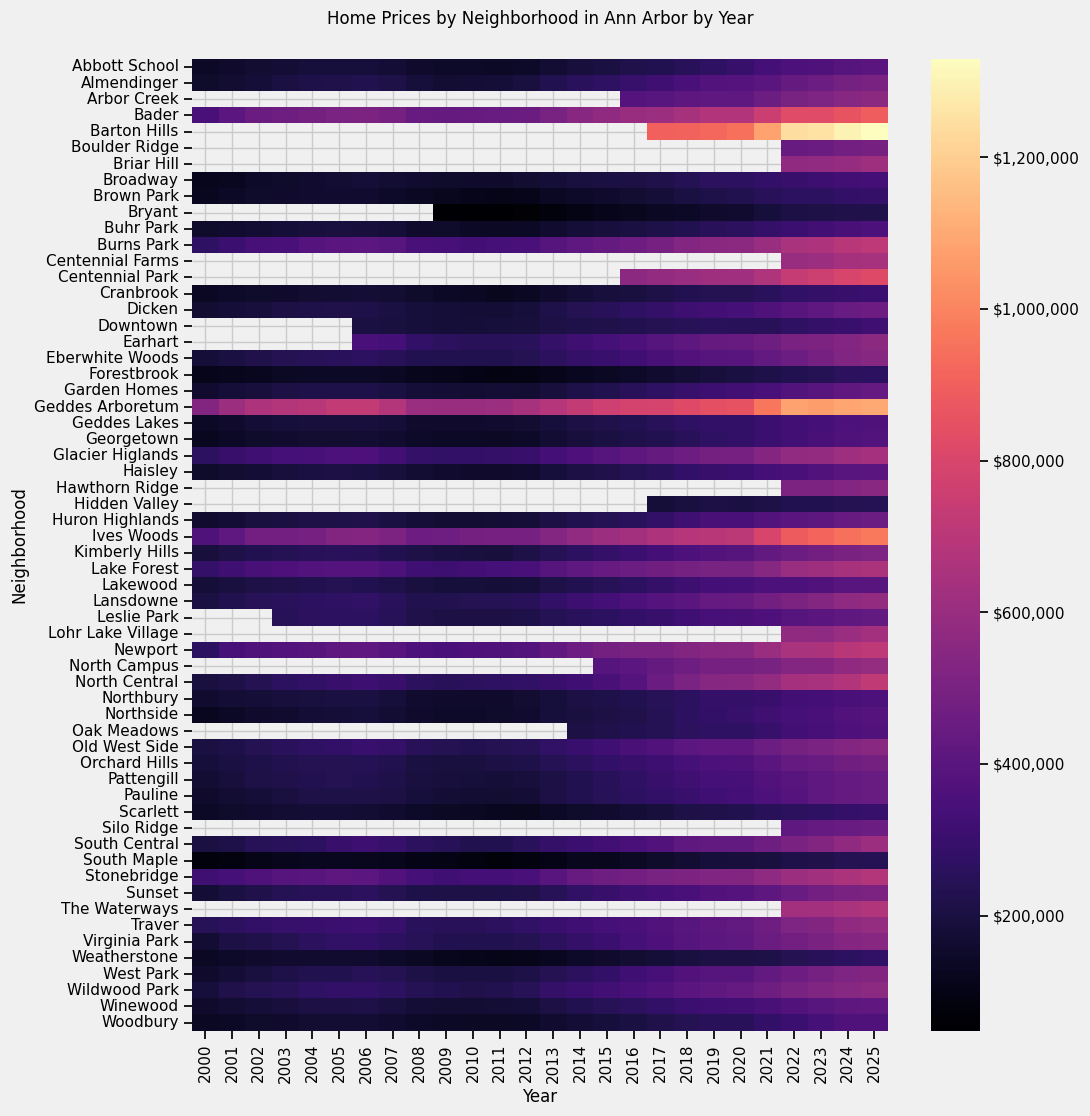

In [44]:
# prepare Data for chart 2
chart_two_df = melted_df.copy()
chart_two_df['Year'] = chart_two_df['Date'].dt.year
agg_df = chart_two_df.groupby(['RegionName', 'Year'])['HomeValue'].agg(['mean', 'std']).reset_index()
neighborhood_data = agg_df.pivot_table(values='mean', index='RegionName', columns='Year')

# create chart 2
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,12))
sns.set_theme(style=style.library['fivethirtyeight'])
heatmap = sns.heatmap(neighborhood_data, cmap='magma')

cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter('${x:,.0f}')

plt.title('Home Prices by Neighborhood in Ann Arbor by Year', pad=25)
plt.xlabel('Year')
plt.ylabel('Neighborhood')